<a href="https://colab.research.google.com/github/Meghna27si/Meghna27si/blob/main/MAIL_SEGMENTATION_PRODIGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
data=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.drop('CustomerID',axis=1,inplace=True)

In [ ]:
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

gender_mappings={index:label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [ ]:
scaler=StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [ ]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [ ]:
max_clusters=100

In [ ]:
kmeans_tests=[KMeans(n_clusters=i, n_init=10) for i in range(1,max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

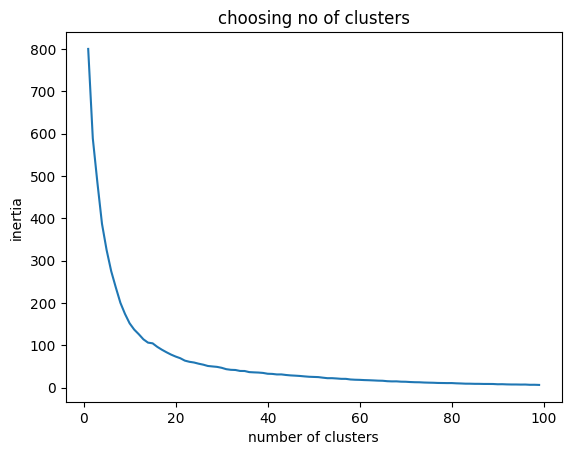

In [ ]:
plt.figure()
plt.plot(range(1,max_clusters), inertias)
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.title("choosing no of clusters")
plt.show()
#elbow method

In [ ]:
kmeans=KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10, n_init=10)

In [ ]:
clusters = kmeans.predict(scaled_data)
clusters

array([0, 0, 2, 6, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 0, 2, 0, 7, 6, 0, 0,
       7, 0, 7, 0, 4, 0, 2, 6, 7, 6, 7, 0, 7, 6, 7, 6, 2, 6, 4, 0, 1, 2,
       4, 6, 4, 2, 2, 2, 4, 0, 2, 1, 4, 1, 4, 1, 2, 1, 1, 0, 4, 4, 1, 0,
       4, 4, 0, 2, 1, 4, 4, 4, 1, 0, 4, 1, 2, 4, 1, 0, 1, 4, 2, 1, 4, 2,
       2, 4, 4, 0, 1, 2, 2, 0, 4, 2, 1, 0, 2, 4, 1, 0, 1, 2, 4, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 4, 4, 4, 4, 0, 2, 4, 8, 2, 3, 5, 8, 1, 8, 5, 8,
       2, 3, 5, 3, 9, 8, 5, 3, 9, 8, 2, 3, 5, 8, 1, 3, 9, 8, 5, 8, 9, 3,
       9, 3, 5, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 9, 8, 5, 8, 5, 8, 9, 3,
       5, 8, 5, 8, 9, 3, 5, 3, 9, 8, 9, 8, 9, 3, 9, 3, 5, 3, 9, 3, 9, 8,
       5, 8], dtype=int32)

In [ ]:
pca=PCA(n_components=2)

reduced_data=pd.DataFrame(pca.fit_transform(scaled_data),columns=['PC1','PC2'])

In [ ]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [ ]:
kmeans.cluster_centers_

array([[ 1.12815215, -1.02205127, -0.75821082,  0.43783969],
       [ 1.12815215,  1.33688862, -0.1989457 , -0.1495474 ],
       [-0.88640526, -0.75639616, -0.35700262, -0.26478982],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.88640526,  1.02787223, -0.2767152 , -0.08674611],
       [ 1.12815215, -0.06498872,  0.98587395, -1.44416206],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [ 0.12087344,  0.90186807, -1.35094333, -1.5023944 ],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442]])

In [ ]:
reduced_centers=pca.transform(kmeans.cluster_centers_)
reduced_centers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.73489077,  0.27816597],
       [ 1.28791094,  0.40092235],
       [-0.54395049, -0.77777045],
       [-1.38150389,  0.3644368 ],
       [ 0.56065809, -0.88296424],
       [ 1.20564953,  1.3193492 ],
       [-1.6696024 , -1.35294268],
       [ 1.68895748, -1.20661628],
       [-0.88272588,  1.65431318],
       [ 0.81659377,  0.24505923]])

In [ ]:
reduced_data['cluster']=clusters

In [ ]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,0
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,2
3,-1.694513,-1.631908,6
4,-0.313108,-1.810483,2
...,...,...,...
195,-1.179572,1.324568,3
196,0.672751,1.221061,9
197,-0.723719,2.765010,8
198,0.767096,2.861930,5


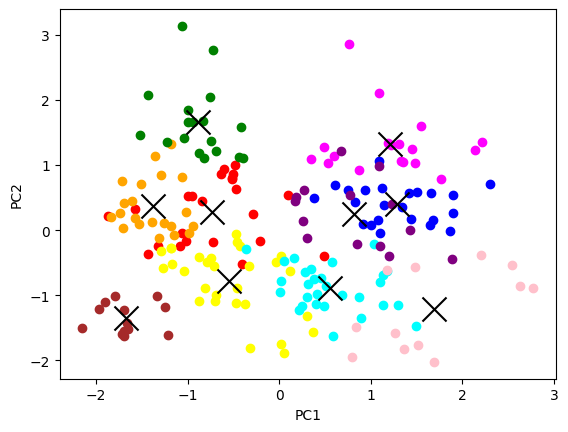

In [ ]:
plt.figure()
plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()